# 1. 神经网络

① 把网络结构放在Sequential里面，好处就是代码写起来比较简介、易懂。

② 可以根据神经网络每层的尺寸，根据下图的公式计算出神经网络中的参数。

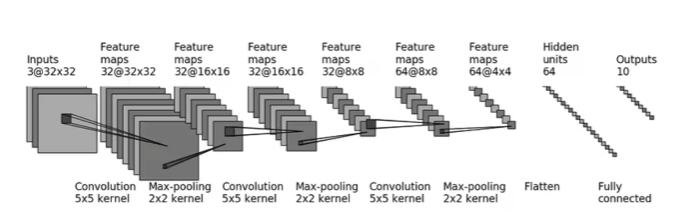

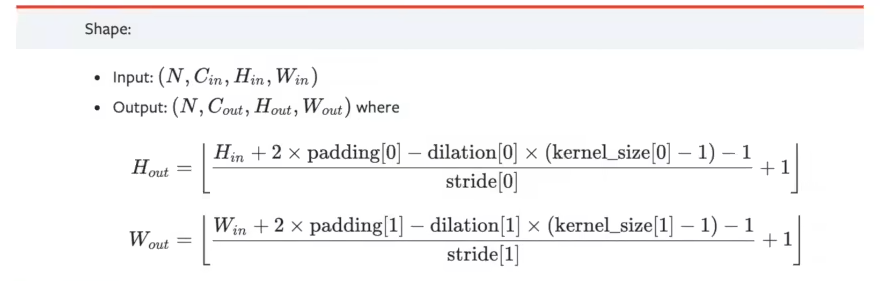

# 2. 搭建神经网络

In [ ]:
import torch
import torchvision
from torch import nn  # 导入神经网络模块
# 从 torch.nn 中导入具体的层，方便后面直接使用，不用写 nn.Conv2d
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear #卷积层，池化层，展平，全连接层

# 语法：定义一个叫 Tudui 的类，继承自 nn.Module
# 作用：这是 PyTorch 模型的标准写法，所有网络都要继承这个父类
class Tudui(nn.Module):
    # --- 1. 初始化函数 ---
    # 作用：在这里“搭建积木”，定义网络中需要用到的各种层
    def __init__(self):
        # 语法：调用父类 nn.Module 的初始化
        # 作用：必须写！初始化父类内部的参数容器，否则报错
        super().__init__()
        # --- 第一层卷积 ---
        # 语法：Conv2d(输入通道数, 输出通道数, 卷积核大小, padding)
        # 作用：输入是3通道（RGB彩色图），输出32个特征图。
        # padding=2 的作用：配合 kernel_size=5，可以保持图片的长宽不变（32x32 -> 32x32）
        self.conv1 = Conv2d(3, 32, 5, padding=2)
        
        # --- 第一层池化 ---
        # 语法：MaxPool2d(池化核大小)
        # 作用：最大池化，把图片长宽减半（32x32 -> 16x16），减少计算量
        self.maxpool1 = MaxPool2d(2)
        
        # --- 第二层卷积 ---
        # 作用：输入接上一层的输出（32），输出保持32不变。
        self.conv2 = Conv2d(32, 32, 5, padding=2) # 修正了变量名 cov2 -> conv2
        
        # --- 第二层池化 ---
        # 作用：再次减半（16x16 -> 8x8）
        self.maxpool2 = MaxPool2d(2)
        
        # --- 第三层卷积 ---
        # 作用：通道数加倍到64，提取更复杂的特征。长宽保持不变（8x8）
        self.conv3 = Conv2d(32, 64, 5, padding=2)
        
        # --- 第三层池化 ---
        # 作用：再次减半（8x8 -> 4x4）
        self.maxpool3 = MaxPool2d(2)
        
        # --- 展平层 ---
        # 作用：把立体的特征图（64通道 × 4高 × 4宽）“拍扁”成一维向量，方便送入全连接层
        self.flatten = Flatten()
        
        # --- 第一层全连接 (Linear) ---
        # 语法：Linear(输入特征数, 输出特征数)
        # 这里的 1024 是怎么来的？ 
        # 答：64(通道) * 4(高) * 4(宽) = 1024。必须算对，否则报错。
        self.linear1 = Linear(1024, 64)
        
        # --- 第二层全连接 ---
        # 作用：输出10，代表 CIFAR-10 数据集的 10 个分类类别（猫、狗、飞机等）
        self.Linear2 = Linear(64, 10)
        
    # --- 2. 前向传播函数 ---
    # 作用：定义数据 x 从输入到输出的流动路径
    def forward(self, x):
        # 假设输入 x 的形状是 (Batch, 3, 32, 32)
        
        x = self.conv1(x)    # 经过卷积 -> (32, 32, 32)
        x = self.maxpool1(x) # 经过池化 -> (32, 16, 16)
        
        x = self.conv2(x)    # 经过卷积 -> (32, 16, 16) (注意这里要和 init 里的名字对应)
        x = self.maxpool2(x) # 经过池化 -> (32, 8, 8)
        
        x = self.conv3(x)    # 经过卷积 -> (64, 8, 8)
        x = self.maxpool3(x) # 经过池化 -> (64, 4, 4)
        
        x = self.flatten(x)  # 拍扁 -> (Batch, 1024)
        
        x = self.linear1(x)  # 全连接 -> (Batch, 64)
        x = self.Linear2(x)  # 输出层 -> (Batch, 10)
        
        return x

# --- 3. 实例化与打印 ---
# 作用：创建模型对象，会触发 __init__
tudui = Tudui()

# 作用：打印模型结构，检查层有没有定义错
print(tudui)

Tudui(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=1024, out_features=64, bias=True)
  (Linear2): Linear(in_features=64, out_features=10, bias=True)
)


1. A. 卷积层输出尺寸公式
   $H_{out} = \left\lfloor \frac{H_{in} + 2 \times padding - dilation \times (kernel\_size - 1) - 1}{stride} + 1 \right\rfloor$
2. B. 池化层输出尺寸公式$H_{out} = \frac{H_{in}}{kernel\_size}$

# 3. 神经网络输入数据

In [8]:
import torch
import torchvision
from torch import nn 
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear

class Tudui(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = Conv2d(3,32,5,padding=2)
        self.maxpool1 = MaxPool2d(2)
        self.conv2 = Conv2d(32,32,5,padding=2)
        self.maxpool2 = MaxPool2d(2)
        self.conv3 = Conv2d(32,64,5,padding=2)
        self.maxpool3 = MaxPool2d(2)
        self.flatten = Flatten()
        self.linear1 = Linear(1024,64)
        self.Linear2 = Linear(64,10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.maxpool3(x)
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.Linear2(x)
        return x

# --- 1. 实例化模型 ---
# 语法：变量名 = 类名()
# 作用：创建 Tudui 这个神经网络类的一个实例对象。
# 此时会自动执行 __init__ 函数，把所有的卷积层、池化层、全连接层都创建好并初始化权重。
tudui = Tudui()

# --- 2. 创建模拟输入数据 ---
# 语法：torch.ones(形状元组)
# 作用：生成一个全为 1 的张量（Tensor），用来模拟真实的图片数据。
# 参数详解 (64, 3, 32, 32)：
#   - 64 (Batch Size): 假装我们要一次性把 64 张图片送进去训练。
#   - 3 (Channels): 图片是彩色的（RGB 3通道）。
#   - 32 (Height): 图片高度 32 像素。
#   - 32 (Width): 图片宽度 32 像素。
input = torch.ones((64, 3, 32, 32))

# --- 3. 前向传播（核心步骤） ---
# 语法：模型对象(输入数据)
# 作用：调用模型的 __call__ 方法，进而自动触发 forward 函数。
# 数据流向：
#   [64, 3, 32, 32] -> 卷积池化层... -> Flatten -> 全连接层... -> 输出
output = tudui(input)

# --- 4. 打印输出形状 ---
# 语法：张量.shape
# 作用：查看经过网络计算后，输出数据的维度是多少。
# 预期结果：torch.Size([64, 10])
#   - 64: 对应输入的 64 张图（没变）。
#   - 10: 对应 CIFAR-10 的 10 个分类类别（概率值）。
print(output.shape)

torch.Size([64, 10])


# 4.nn.Sequential（序列容器）

In [ ]:
import torch
import torchvision
from torch import nn 
# 导入 Sequential，它是这段代码的主角
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear, Sequential

class Tudui(nn.Module):
    def __init__(self):
        super().__init__() # 必写：初始化父类
        
        # --- 这里的变化最大 ---
        # 语法：self.变量名 = Sequential(层1, 层2, 层3...)
        # 作用：创建一个“序列容器”。
        # 原理：Sequential 会像传送带一样，让数据自动按照你写的顺序，依次经过里面的每一层。
        # 好处：代码更整洁，不需要给每一层都起个名字（比如 conv1, conv2...），直接把它们堆进去就行。
        self.model1 = Sequential(
            Conv2d(3, 32, 5, padding=2),      # 第1步：卷积 -> (32, 32, 32)
            MaxPool2d(2),                     # 第2步：池化 -> (32, 16, 16)
            
            Conv2d(32, 32, 5, padding=2),     # 第3步：卷积 -> (32, 16, 16)
            MaxPool2d(2),                     # 第4步：池化 -> (32, 8, 8)
            
            Conv2d(32, 64, 5, padding=2),     # 第5步：卷积 -> (64, 8, 8)
            MaxPool2d(2),                     # 第6步：池化 -> (64, 4, 4)
            
            Flatten(),                        # 第7步：展平 -> (1024)
            Linear(1024, 64),                 # 第8步：全连接 -> (64)
            Linear(64, 10)                    # 第9步：输出层 -> (10)
        )
        
    def forward(self, x):
        # --- 这里的变化也很大 ---
        # 语法：self.容器名(输入)
        # 作用：直接把 input 扔进 model1 这个传送带。
        # 它会自动执行：input -> Conv1 -> Pool1 -> ... -> Linear2 -> output
        # 以前你要写 10 行代码，现在只要 1 行。
        x = self.model1(x)
        return x

# 实例化模型
tudui = Tudui()

# 创建假数据：64张图，3通道，32x32大小
input = torch.ones((64, 3, 32, 32))

# 前向传播测试
output = tudui(input)

# 打印输出形状，预期结果：torch.Size([64, 10])
print(output.shape)

torch.Size([64, 10])
